<a href="https://colab.research.google.com/github/Shubham04689/colab_notebooks/blob/main/Isomap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objective

At the end of the experiment, you will be able to:

*   visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying the Isomap algorithm
*   understand how the introduction of noise into data affects the lower-dimensional (2D) representation of data




## Dataset

### Description

The dataset chosen for this experiment is a swissroll.

## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just project a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like, geometry and similarity between points we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



## AIML Technique

In this experiment, swiss roll data is a high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning is, **Isomap** which performs dimensionality reduction by seeking lower dimensional embedding in data. Isomap maintains the geodesic distances between the points. This problem is unsupervised: it learns the non-linear structure in the data from the swiss roll data itself.

## Import the required packages


In [1]:
import requests

def download_file(url, filename):
  """Downloads a file from a URL.

  Args:
    url: The URL of the file to download.
    filename: The name of the file to save the downloaded content to.
  """
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(filename, 'wb') as f:
      for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

    print(f"Downloaded file to: {filename}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading file: {e}")


url = "https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt"
filename = "AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt"

download_file(url, filename)



Downloaded file to: AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt


In [2]:
from sklearn.datasets import *
# Manifold is imported to access swiss roll dataset and the dimensionality reduction approach: Isomap
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Generate the swiss roll data

Note: Refer to [make_swiss_roll](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) from sklearn package

In [3]:
# Specify the number of data samples to be generated from swiss roll
n_samples = 1500

'''we use make_swiss_roll method which takes the number of data samples and
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''

X, color = make_swiss_roll(n_samples)

In [4]:
# Print the shape of 'X' and 'color'
X.shape, color.shape

((1500, 3), (1500,))

As you can see above, each of the points in 'X' is labeled with a color label in 'color' variable.

**Note:** Here we are not using the label for classification purpose, but only for plotting swiss roll with different points which represents different set of colors



## ISOMAP

By using ISOMAP, reduce the dimensions of data from higher to lower

Consider swiss roll data, how to find or preserve the geodesic distance between each data point along the manifold?

First connect every data point in the swiss roll with the K-nearest neighbors.


#### Varying the parameter of the number of neighbors

The **n_neighbors** in the Isomap, is the number of neighbors a given point must consider, so that all the pair-wise distances between all these points are calculated, and the shortest graph path is found. This is considered as the actual distance between any two points in the 3d (and not Euclidean distance). The **n_components** , is nothing but the number of lower dimensions you seek. Since already the data is in
3d, we are choosing the next best i.e. 2D i.e. 2 components here.


**Note:** Refer [ISOMAP](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html) from sklearn

In [5]:
'''we use Isomap technique from manifold which takes input as number of neighbors to be
   considered for each point calculated using a nearest neighbor search algorithm
   in the swiss roll data and manifold dimensions that the swiss roll data has to be transformed to'''

# Create an object of Isomap class
# Fit and transform the data to Isomap by getting distance along the manifold

iso_data = Isomap(n_neighbors=4, n_components=2).fit_transform(X)

In [6]:
iso_data.shape

(1500, 2)

Let us visualize the Swiss roll data

*   First plot, Visualize the data in 3D
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def visualizeSwissRoll(iso_data, X, color):
    fig = plt.figure(figsize=(20,18))
    ax = fig.add_subplot(2, 1, 1,projection='3d')
    ax.set_title('Here is the swiss roll maniflod in 3D', fontsize=10)
    ax.scatter(X[:, 0],X[:, 1],X[:, 2], c = color, cmap="Accent", s=50)
    ax.view_init(azim=-77, elev=12) # To rotate the axe programmatically, ‘elev’ elevation angle, ‘azim’ azimuth angle.
    x = X[:, 0][2:10]    # Randomly choosing the samples to plot in 3D for visualization
    y = X[:, 1][2:10]
    ax.scatter(x, y, c = "black") # Now randomly plot the 'black' samples in 3D manifold (this may not be clearly visible in 3D)
    ax.plot(x[2:4], y[2:4], c = "red") # Check the connection between two samples in 3D
    ax = fig.add_subplot(2, 1, 2)

    # Visualize the 2D plot after compressing the data using ISOMAP
    ax.set_title('After compressing with ISOMAP', fontsize=10)
    # cmap ="Accent" will generate 8 colors even our data has large color space values
    ax.scatter(iso_data[:, 0], iso_data[:, 1], c = color, cmap="Accent", s=60)

    # Choose the same samples used in 3D to plot in 2D and observe that the distance between 2 samples is preserved
    # The connection between 2 samples is clearly visible in 2D
    x = X[:, 0][2:10]
    y = X[:, 1][2:10]
    ax.scatter(x, y, c = "black") # Now plot the same 'black' samples, after reducing using ISOMAP in 2D and observe how manifold is preserving the distance between 2 samples
    ax.plot(x[2:4], y[2:4], c = "red")  # Connection between 2 samples

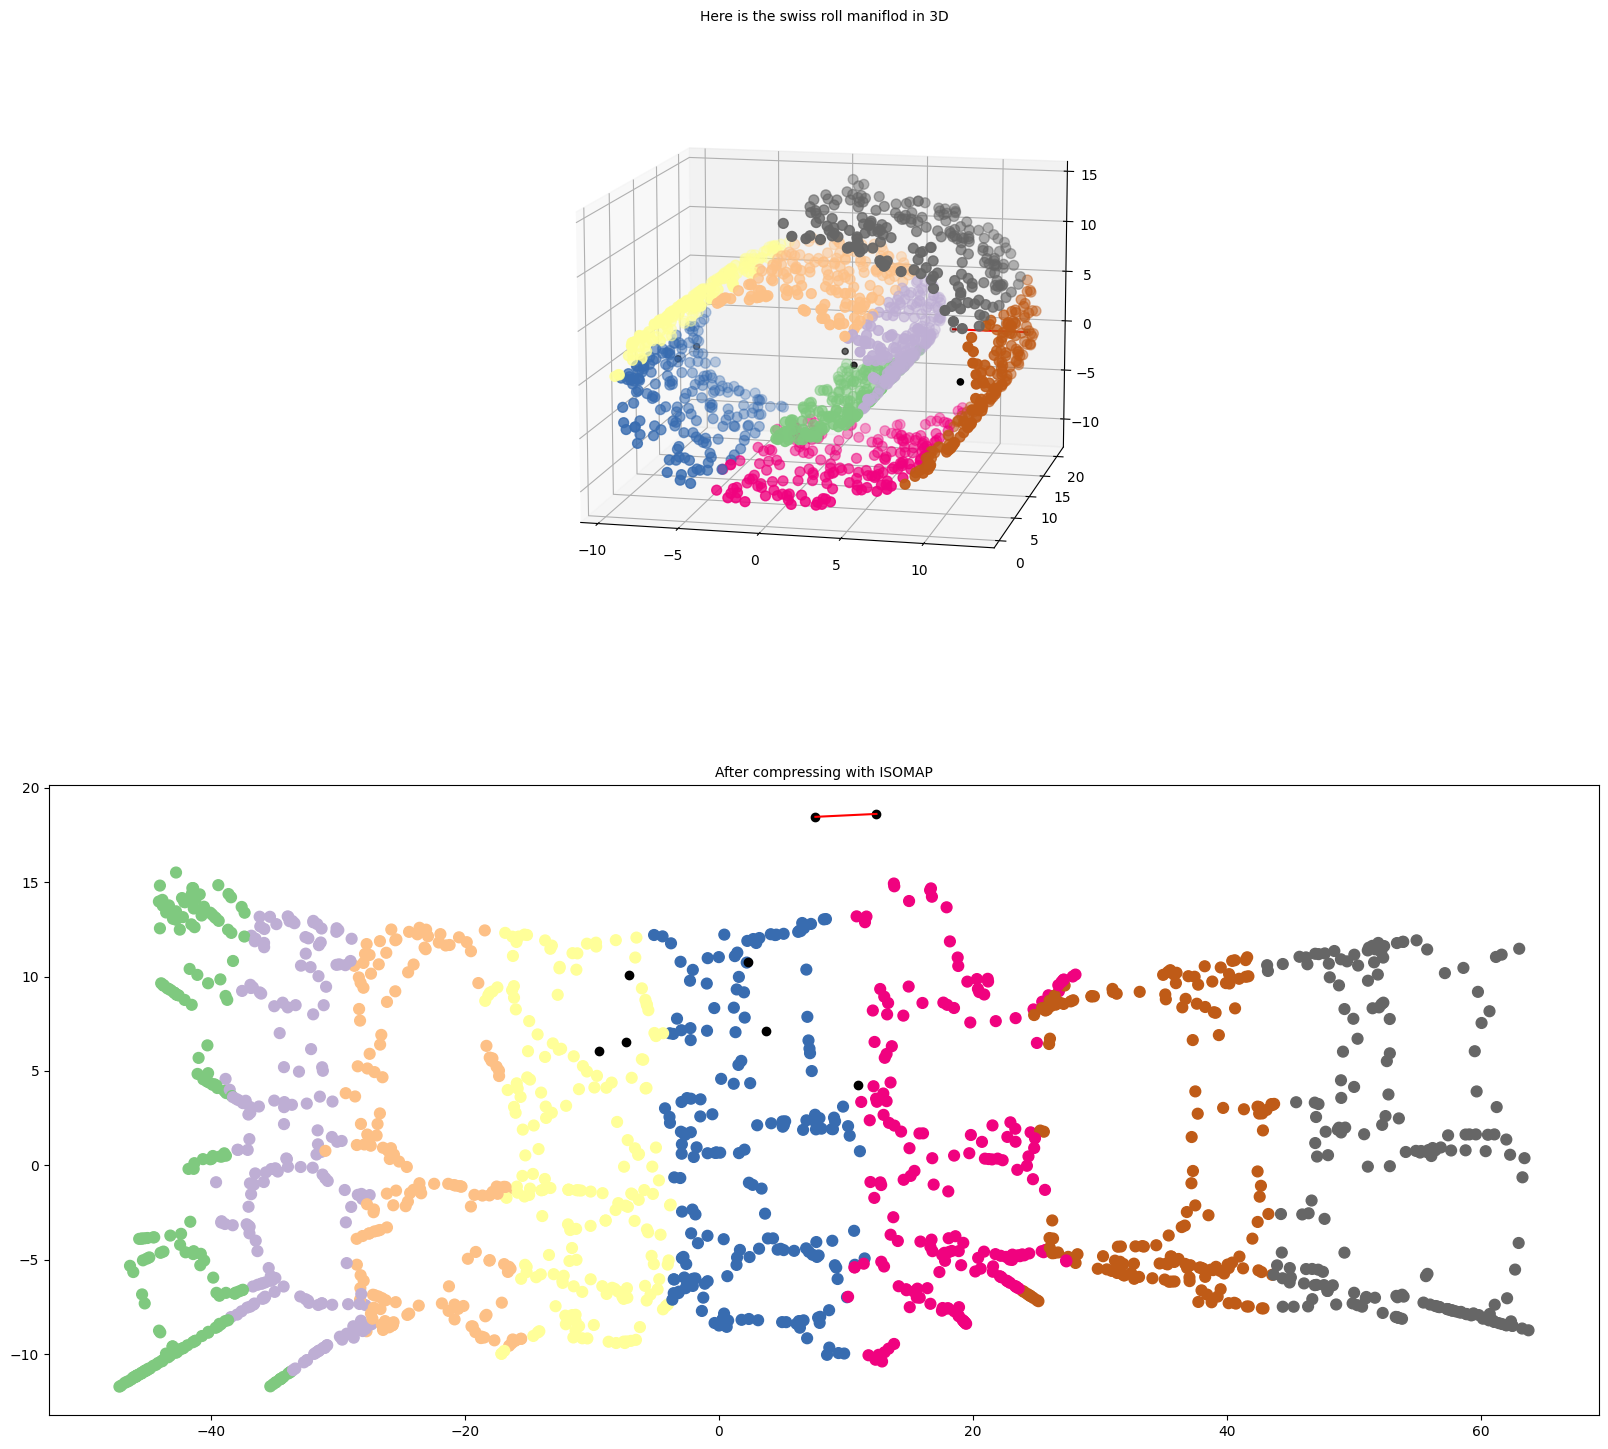

In [8]:
# Calling the function to visualize the swissroll
visualizeSwissRoll(iso_data, X, color)

Experiment with different values of **n_neighbors** to be passed to Isomap and observe the change in the structure of manifold

If the 'K' value is very small the neighborhood graph is too sparse and therefore it cannot capture the geodesic distances

In [9]:
# Fit and transform the data to Isomap with 'n_neighbor = 6' by getting distance along the manifold
iso_data = Isomap(n_neighbors=6, n_components=2).fit_transform(X)

Let us visualize the Swiss roll data

*   First plot, Visualize the data in 3D
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

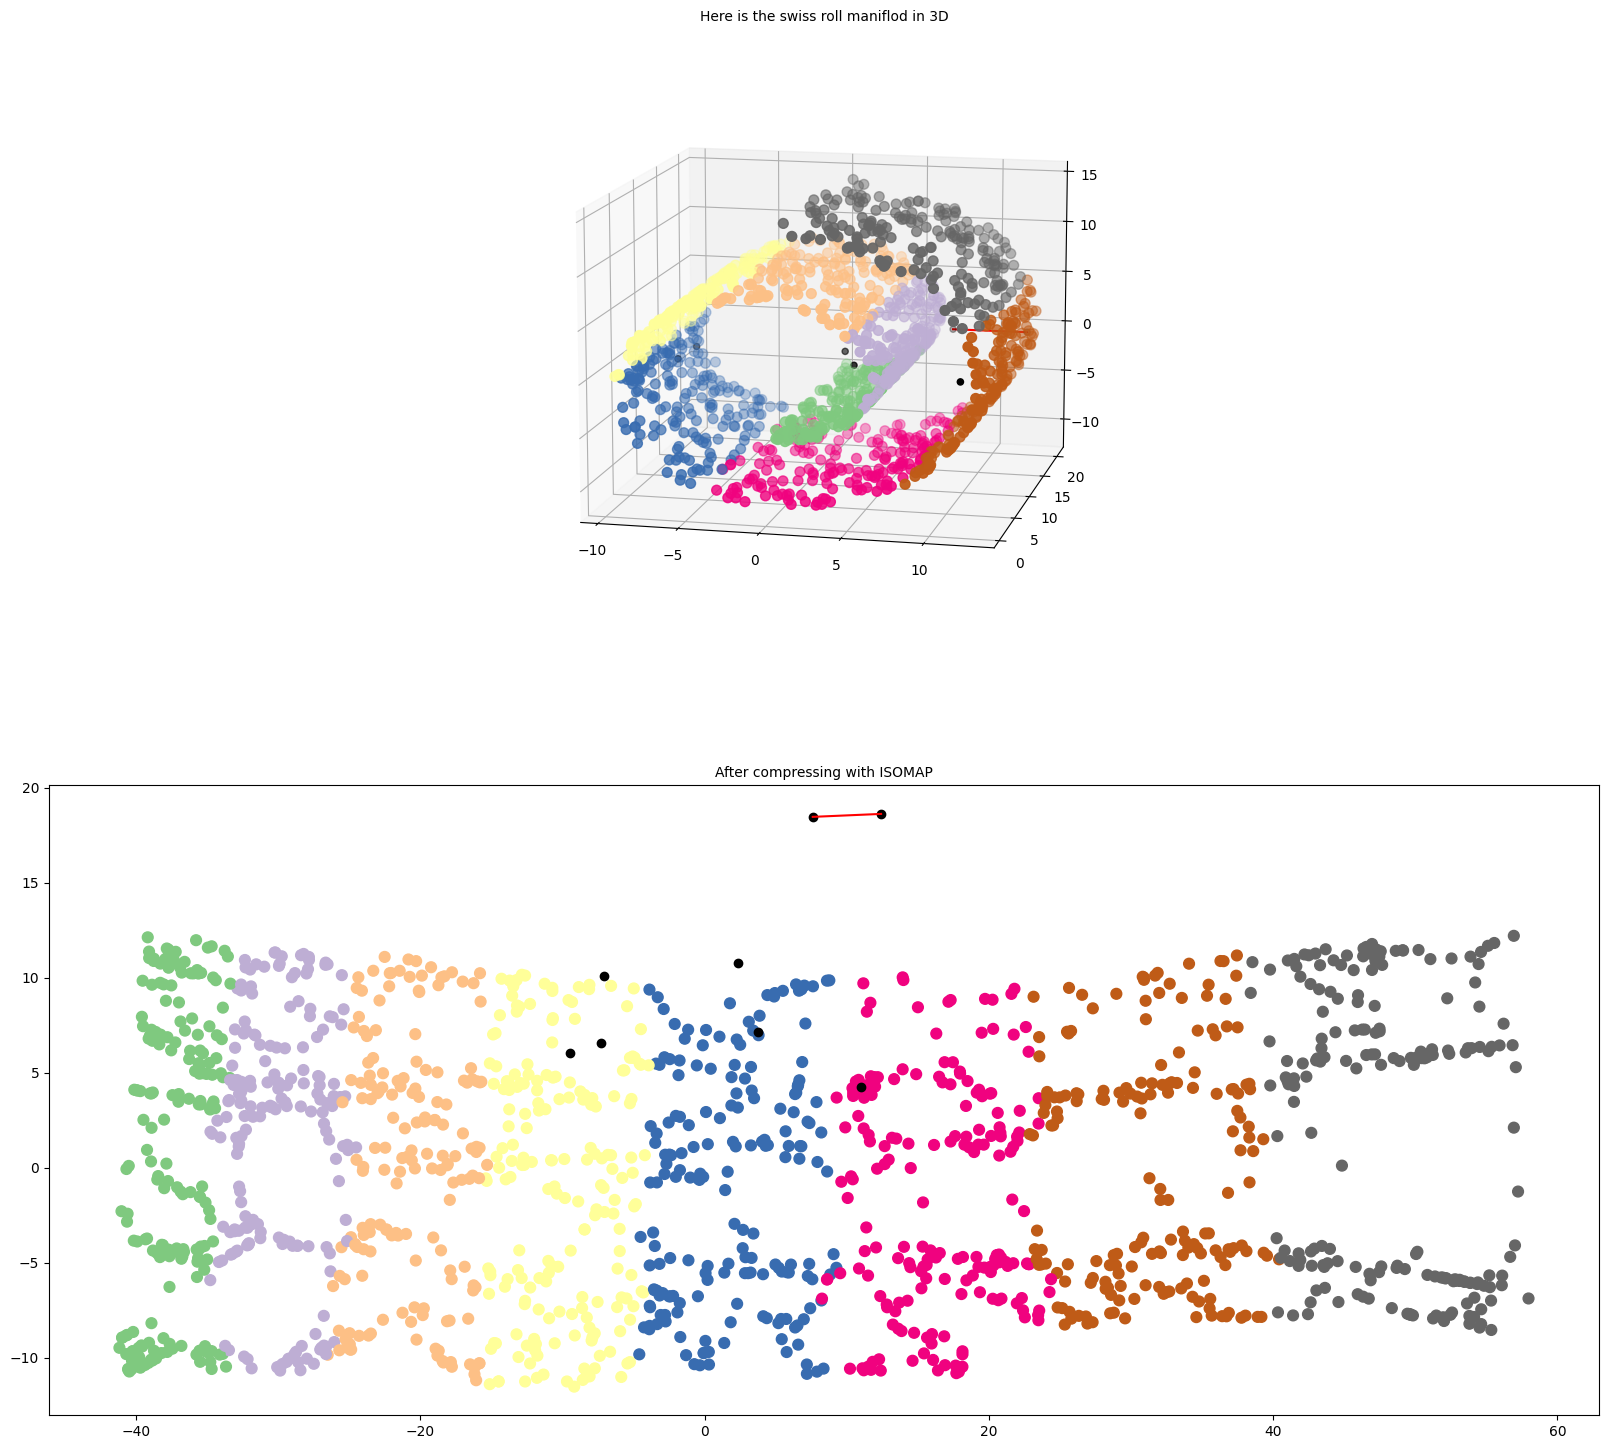

In [10]:
# Calling the function to visualize the swissroll
visualizeSwissRoll(iso_data, X, color)

Let us generate swiss roll data for 300 samples with some noise in it.

**NOTE:** Noise here below has two components. i.e. number of samples  and variance (i.e. the 'noise' variable you see below). The idea here is, for example, you have only 10 samples, but they may contain a huge variance i.e. one noisy point can be in a 3D location at (2, 3, 2) and other noisy point can be in a 3D location at (40, 80, 100). As you can see the range of noise is high in the example just quoted. However, if the variance is low, the 3d point locations will be closer (and hence, as you might guess, the noise is less likely to disrupt the Manifold)


#### Varying parameters of the range of noise i.e variance in the data, where noise = 0.01 * 200

In [11]:
''' make_swiss_roll allows you to pass range of noisy samples along with n_samples
where the range of noise affects the variance around data samples'''

# Generating the swiss roll data by adding noise
ndata, colors = make_swiss_roll(n_samples = 300, noise = 0.01 * 200 )

Let us concatenate the noise data values and original data values

In [12]:
import numpy as np

In [13]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''

con_data =  np.concatenate((X, ndata), axis = 0) # X is orginal data and ndata is noise data
con_colors = np.concatenate((color,colors), axis = 0) # color is orginal and colors are noise

iso_con_data = Isomap(n_neighbors=10, n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

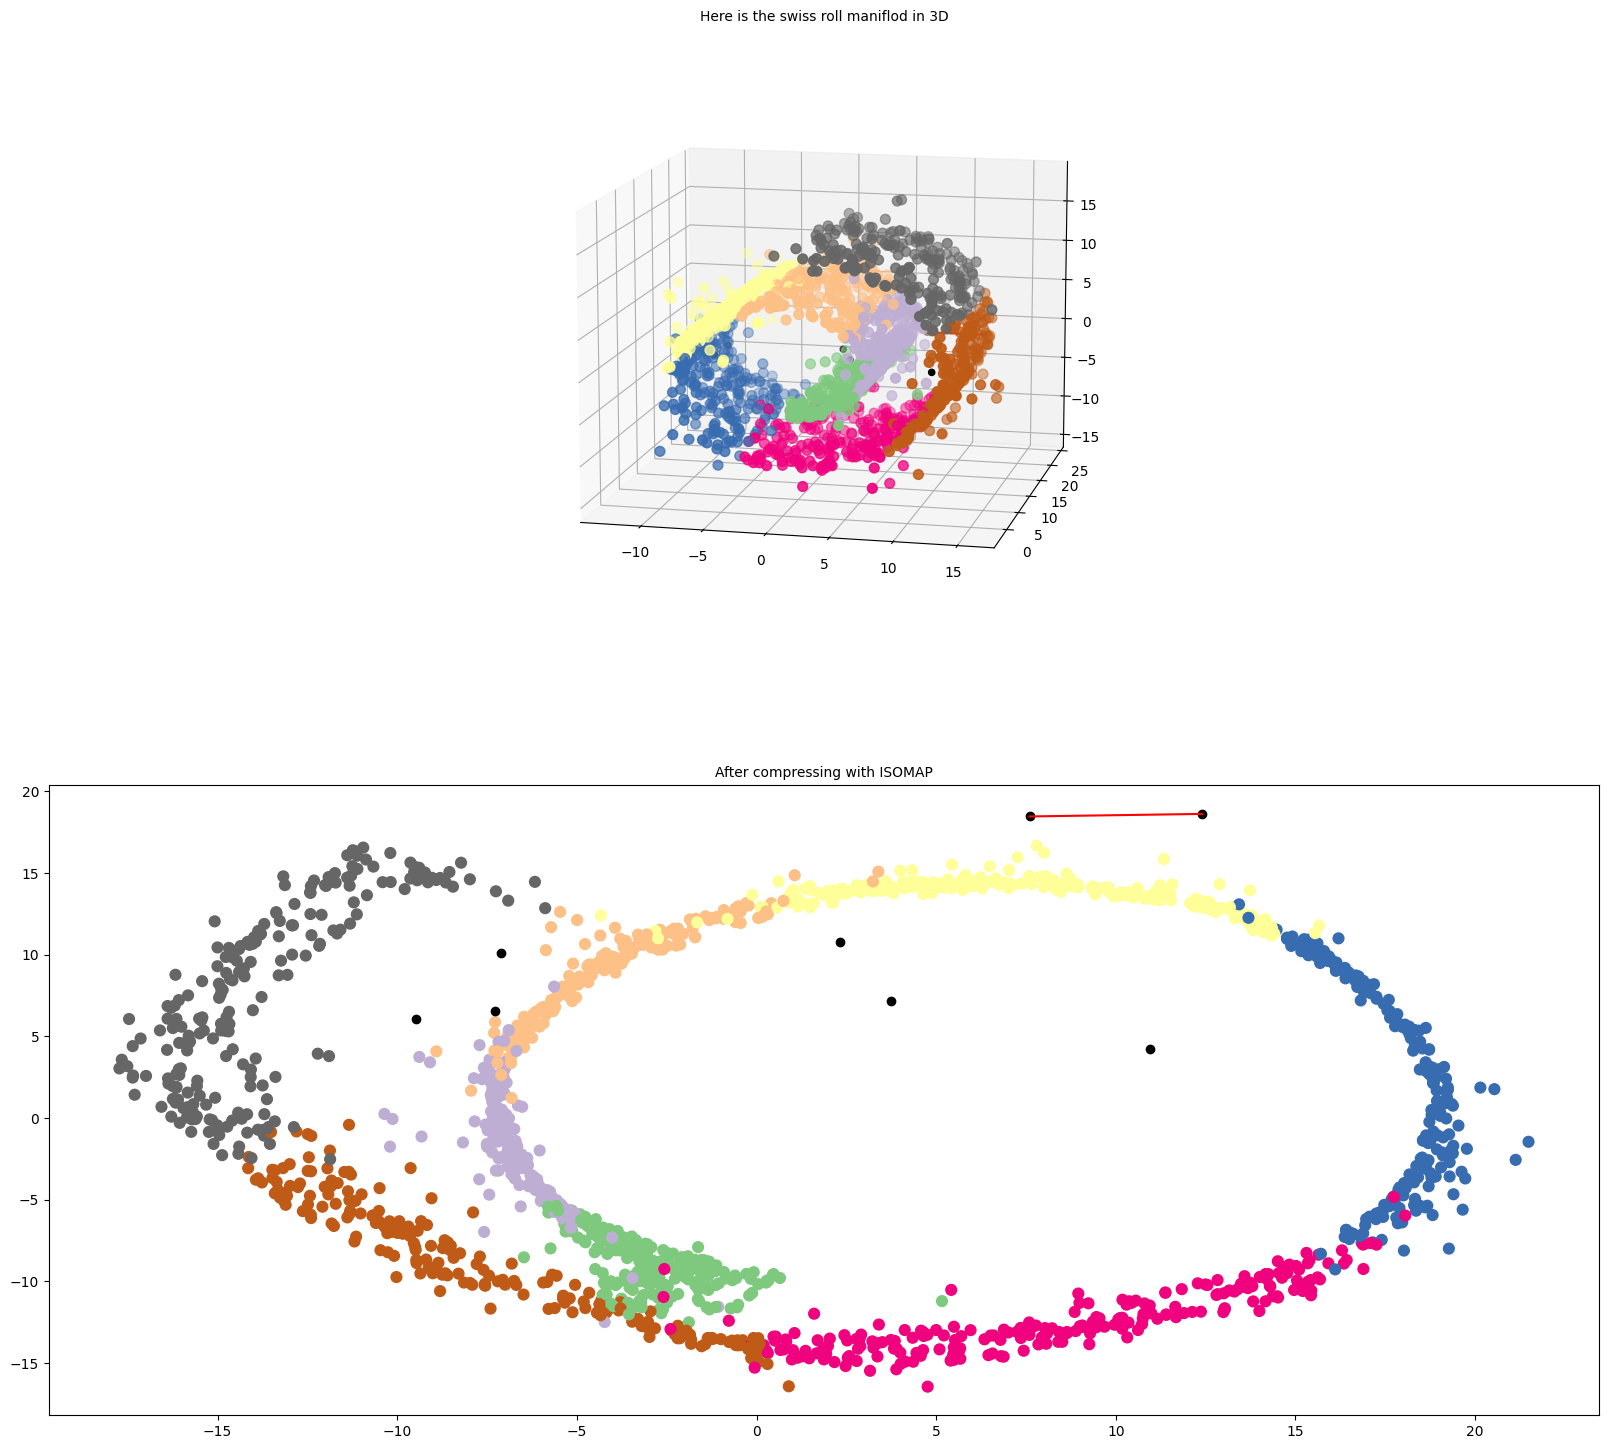

In [14]:
visualizeSwissRoll(iso_con_data, con_data, con_colors)

As the variance is high, the manifold structure is not clearly visible in the above graph. Try reducing the variance and observe the change in the structure of manifold

#### Varying parameters of the range of noise i.e variance in the data, where noise = 0.01 * 50


In [15]:
# Tweak noise i.e the variance around data samples to visualize the representation

ndata, colors = make_swiss_roll(n_samples = 300, noise = 0.01 * 50 )

In [16]:
# Let us concatenate the noise data values and original data values
con_data =  np.concatenate((X, ndata), axis = 0)
con_colors = np.concatenate((color, colors), axis = 0)

iso_con_data = Isomap(n_neighbors=10, n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

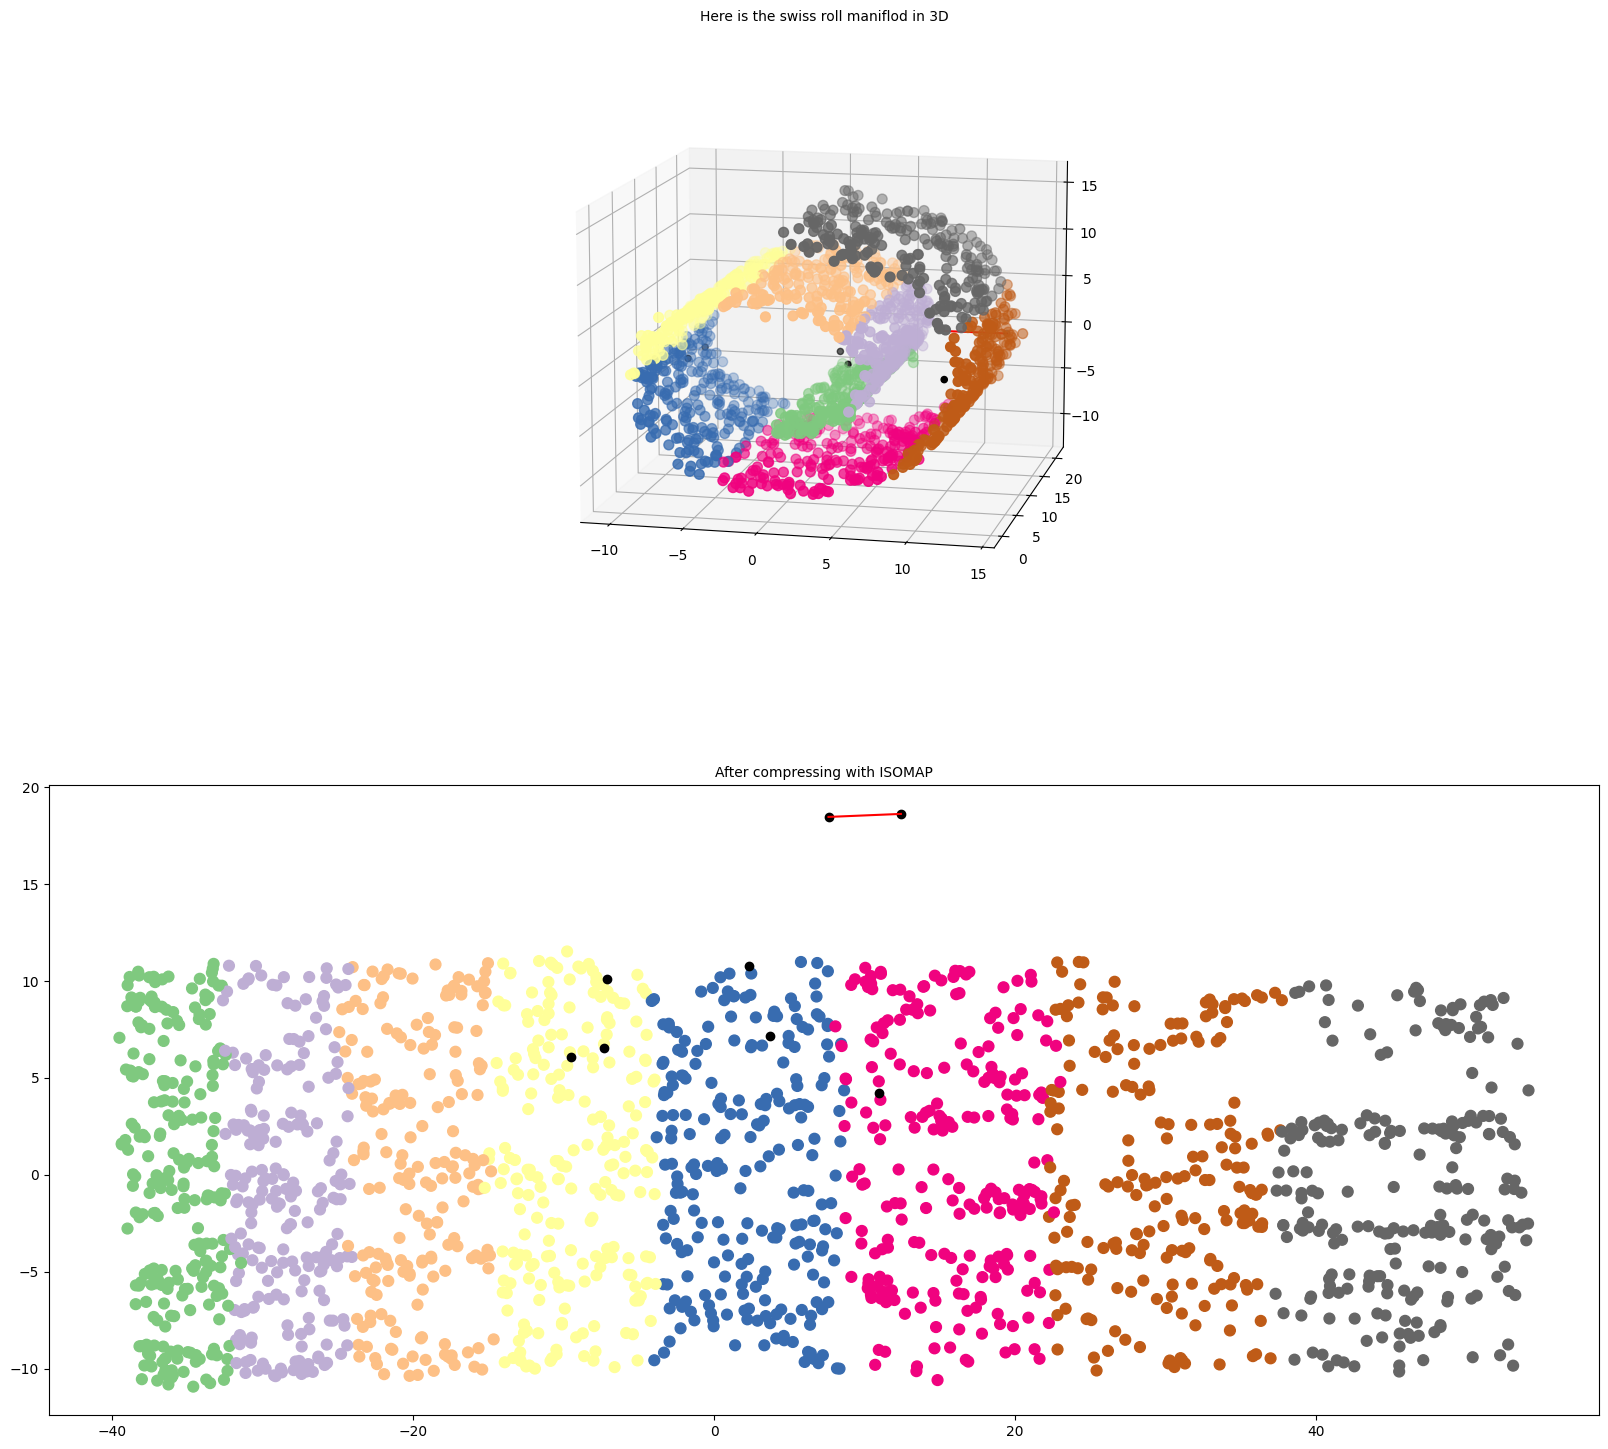

In [17]:
visualizeSwissRoll(iso_con_data, con_data, con_colors)

As you can see above, when the variance of noise is reduced, the 2D representation of Manifold looks fine. The rest of the experiment is with varying the values of noise and the number of samples, is merely for the sake of trying things out, and always noticing that ISOMAP is very sensitive to Noise, which other techniques such as TSNE will deal better with. You can see the same in TSNE experiment

#### Varying parameters of the number of samples of data with noise and visualize the data

*   n_samples = 20,
*   noise = 0.01 * 200

In [18]:
# Tweak noise i.e the variance around data samples to visualize the representation

ndata, colors = make_swiss_roll(n_samples = 20, noise = 0.01 * 200 )

In [19]:
# Let us concatenate the noise data values and original data values
con_data =  np.concatenate((X, ndata), axis = 0)
con_colors = np.concatenate((color, colors), axis = 0)

iso_data = Isomap(n_neighbors=10, n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying TSNE

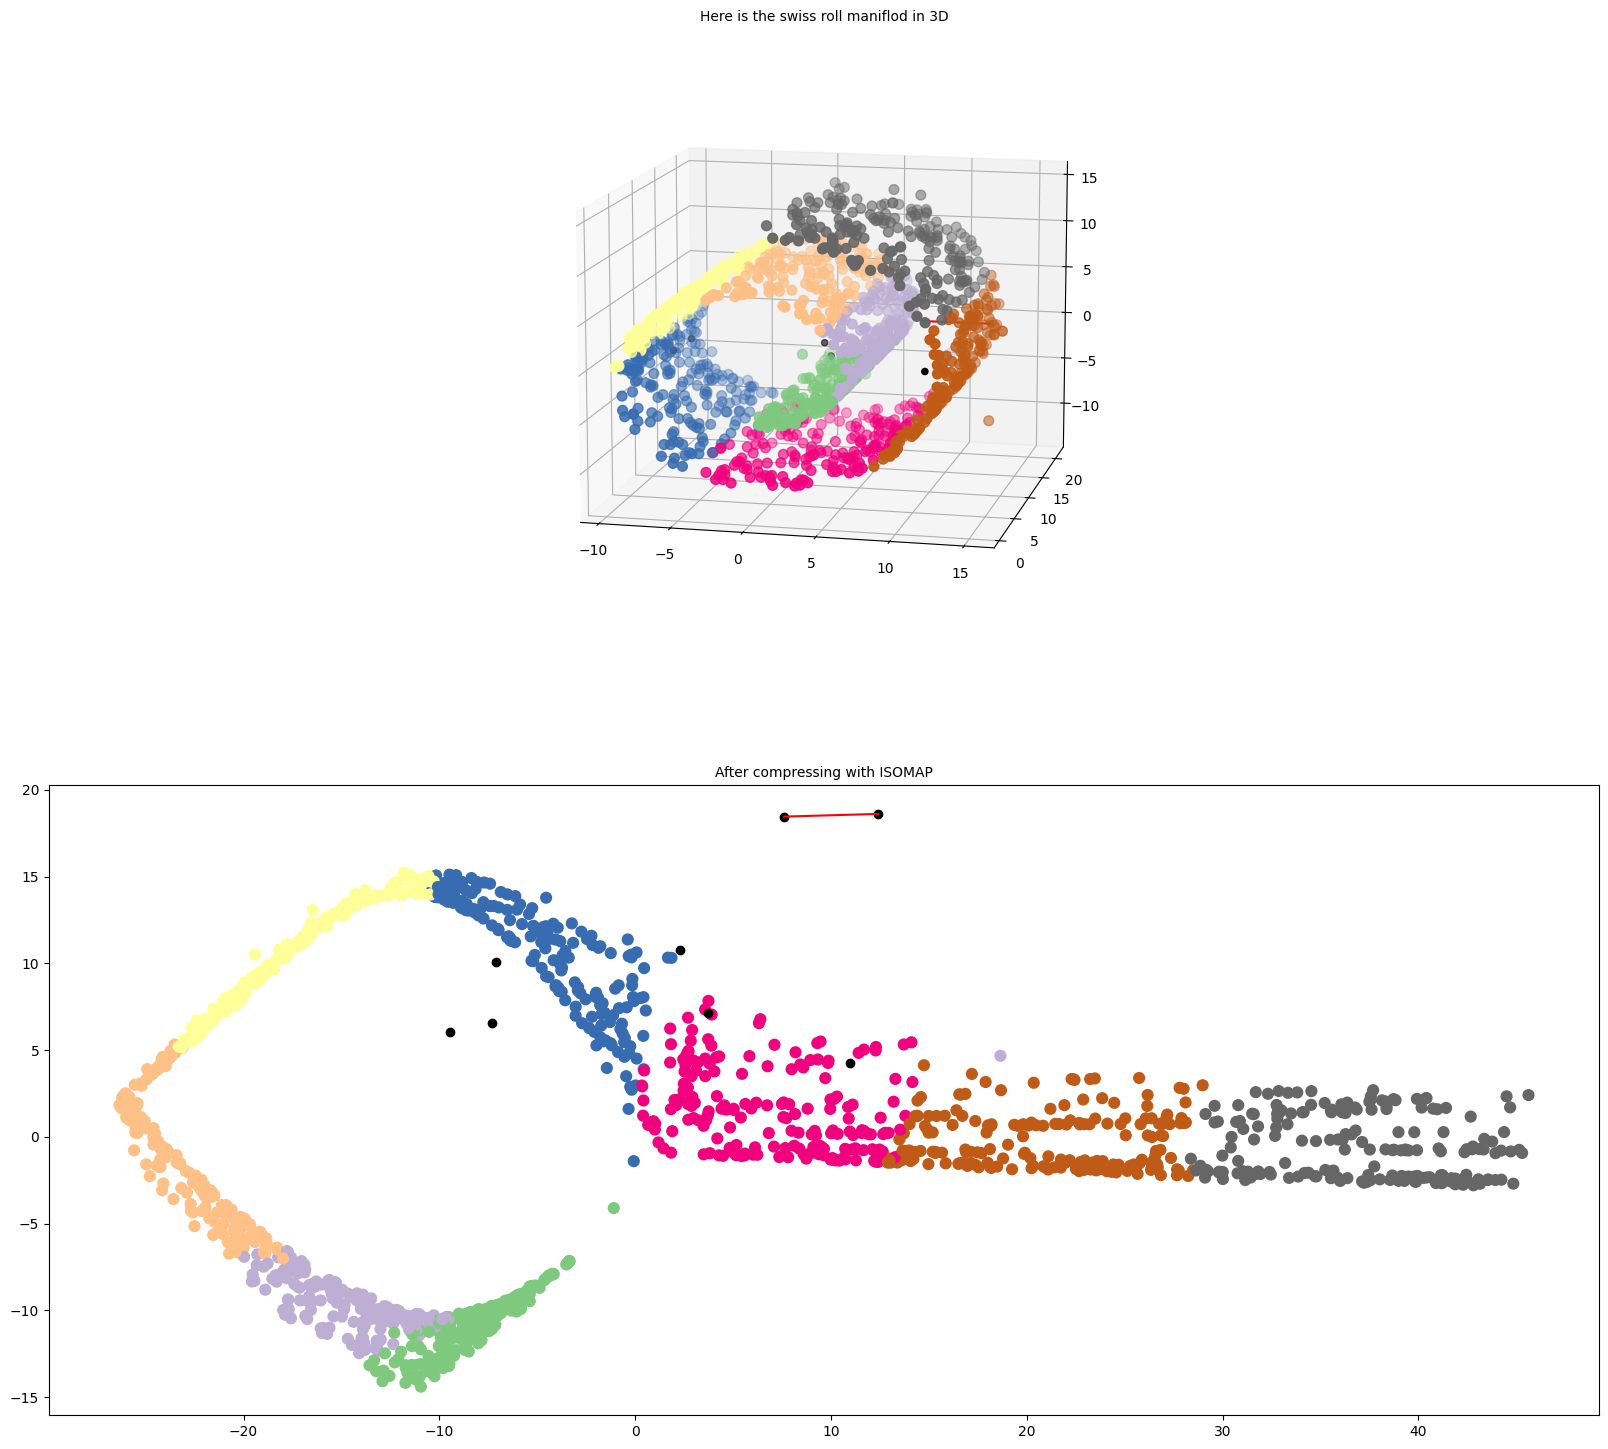

In [20]:
visualizeSwissRoll(iso_data, con_data, con_colors)

#### Summary

ISOMAP has the basic idea of preserve geodesic distance as measured along the manifold, hence can flatten (unroll) the swiss roll. Notice that Isomap connects nearby points and hence preserves the geodesic distances. This makes it prone to "short-circuit errors" in which due to noise, the nearest neighbours change and the dimensionality reduction fails due to this extra connectivity. This is illustrated by it failing to unroll the swiss roll.